## General Social Survery EDA (Checkpoint 1)

Alan Jian 3033730509

Shreya Chowdhury 3033623454

Matilda Ju 3033728143

Yannie Li

In [ ]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# All columns related to moral questions
moral = pd.read_spss('./GSS/GSS7218_R3.sav', usecols=["YEAR", 'GUNLAW', "GRASS","HOMOSEX","INCOME"], 
                     convert_categoricals=True)

In [ ]:
# Transform str to int
moral["YEAR"] = np.array(moral["YEAR"]).astype(int)

In [ ]:
# Limit years to later than 2000
moral = moral[moral['YEAR'] >=2000]
moral

,YEAR,INCOME,GUNLAW,GRASS,HOMOSEX
38116,2000,NaN,OPPOSE,NaN,NOT WRONG AT ALL
38117,2000,$8000 TO 9999,FAVOR,NOT LEGAL,NaN
38118,2000,$15000 - 19999,NaN,NOT LEGAL,NaN
38119,2000,$25000 OR MORE,NaN,LEGAL,NaN
38120,2000,$25000 OR MORE,NaN,NOT LEGAL,NaN
...,...,...,...,...,...
64809,2018,NaN,OPPOSE,NaN,NOT WRONG AT ALL
64810,2018,$25000 OR MORE,OPPOSE,NaN,NaN
64811,2018,$25000 OR MORE,FAVOR,LEGAL,NOT WRONG AT ALL
64812,2018,$25000 OR MORE,NaN,NOT LEGAL,NaN


In [ ]:
moral_gun_grass = moral[["GUNLAW", "GRASS"]]
moral_gun_grass = pd.get_dummies(moral_gun_grass)[["GUNLAW_FAVOR", "GRASS_LEGAL"]]
moral_gun_grass

,GUNLAW_FAVOR,GRASS_LEGAL
38116,0,0
38117,1,0
38118,0,0
38119,0,1
38120,0,0
...,...,...
64809,0,0
64810,0,0
64811,1,1
64812,0,0


In [ ]:
arr = np.vstack((moral_gun_grass["GUNLAW_FAVOR"], moral_gun_grass["GRASS_LEGAL"]))
arr = moral_gun_grass.value_counts().to_numpy().reshape(2,2)
arr

array([[11608,  8604],
       [ 4000,  2486]])

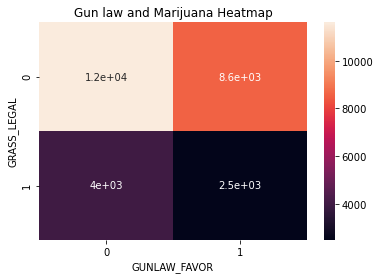

In [ ]:
sns.heatmap(data=arr, annot = True)
plt.title("Gun law and Marijuana Heatmap")
plt.ylabel("GRASS_LEGAL")
plt.xlabel("GUNLAW_FAVOR");

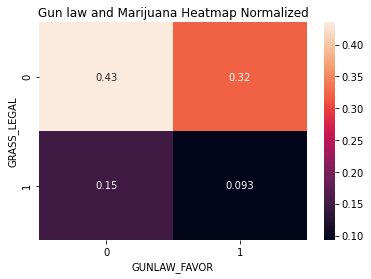

In [ ]:
sns.heatmap(arr / np.sum(arr), annot=True)
plt.title("Gun law and Marijuana Heatmap Normalized")
plt.ylabel("GRASS_LEGAL")
plt.xlabel("GUNLAW_FAVOR");

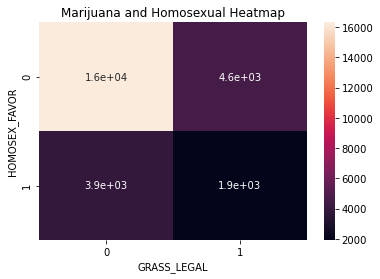

In [ ]:
homosex_cat  = pd.get_dummies(moral["HOMOSEX"])
homosex_cat = homosex_cat[["NOT WRONG AT ALL"]]
homosex_cat = homosex_cat.rename(columns = {"NOT WRONG AT ALL": "HOMOSEX_FAVOR"})
moral_gun_grass["HOMOSEX_FAVOR"] = homosex_cat["HOMOSEX_FAVOR"]
moral_transformed = moral_gun_grass
arr = moral_transformed[["GRASS_LEGAL", "HOMOSEX_FAVOR"]].value_counts().to_numpy().reshape(2,2)
sns.heatmap(data=arr, annot = True)
plt.title("Marijuana and Homosexual Heatmap")
plt.ylabel("HOMOSEX_FAVOR")
plt.xlabel("GRASS_LEGAL");

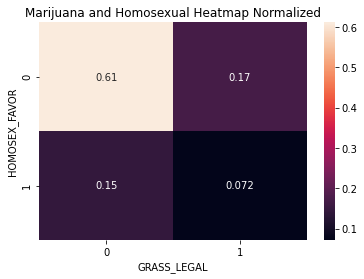

In [ ]:
sns.heatmap(arr / np.sum(arr), annot=True)
plt.title("Marijuana and Homosexual Heatmap Normalized")
plt.ylabel("HOMOSEX_FAVOR")
plt.xlabel("GRASS_LEGAL");

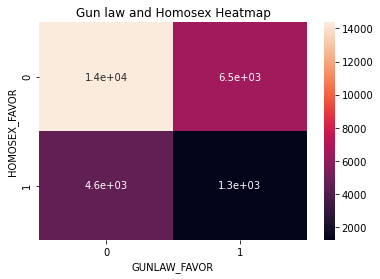

In [ ]:
arr = moral_transformed[["GUNLAW_FAVOR", "HOMOSEX_FAVOR"]].value_counts().to_numpy().reshape(2,2)
sns.heatmap(data=arr, annot = True)
plt.title("Gun law and Homosex Heatmap")
plt.xlabel("GUNLAW_FAVOR")
plt.ylabel("HOMOSEX_FAVOR");

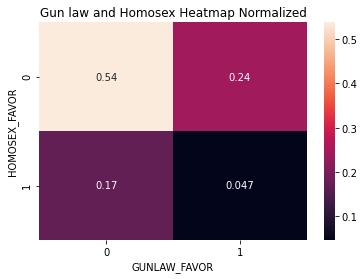

In [ ]:
sns.heatmap(arr / np.sum(arr), annot=True)
plt.title("Gun law and Homosex Heatmap Normalized")
plt.xlabel("GUNLAW_FAVOR")
plt.ylabel("HOMOSEX_FAVOR");

---

## Interpretation

Going into this investigation, we were particularly interested in the relationships between individuals’ opinions regarding hot-button issues in American Politics. We started by plotting heatmaps to determine the correlation between individuals’ opinions regarding marijuana legalization, whether they favor or oppose gun permit laws, and their opinion regarding same-sex relationships.

For Marijuana vs Gun Reg: it seems like there’s a fair amount of co-occurence between those who oppose both marijuana legalization, and gun regulation. Over 43% of respondents oppose both of these measures. This is what we expected, as most of the data is from older years, in which a majority of Americans had more conservative views on these issues. In addition, it also raises the question of whether a latent variable is affecting respondents answers to these questions, such as age or underlying political affiliation.

Homosexuality vs Gun Reg: Even stronger here is the suggestion that there is an underlying latent variable of political affiliation affecting our results. Based on our heatmap, you can see the effects via column-wise rates: those that favor gun regulations are far more likely to support homosexual relations, whereas those that oppose gun regulations almost unanimously oppose same-sex relations. This is consistent with the platform commonly supported by Democrats and Republicans, and provides further evidence that political polarization is affecting these observed phenomena.

Homosexuality vs Marijuana: Of the heatmaps that we drew up based on the data, this most clearly demonstrates the impact of having survey data sourced from the early 2000s. Over 61% of respondents do not support marijuana legalization or homosexual relationships, a number that is sure to have gone down due to public exposure, media campaigns, and other movements that have occured in the last decade.

In [ ]:
income = moral[["INCOME"]]
income_dummies = pd.get_dummies(income["INCOME"])
income_dummies = income_dummies[["LT $1000", "$1000 TO 2999", "$3000 TO 3999", "$4000 TO 4999", "$5000 TO 5999",
                               "$6000 TO 6999",  "$7000 TO 7999", "$8000 TO 9999", "$10000 - 14999", "$15000 - 19999",
                                "$20000 - 24999", "$25000 OR MORE"]] # rearranging bins
income_dummies

,LT $1000,$1000 TO 2999,$3000 TO 3999,$4000 TO 4999,$5000 TO 5999,$6000 TO 6999,$7000 TO 7999,$8000 TO 9999,$10000 - 14999,$15000 - 19999,$20000 - 24999,$25000 OR MORE
38116,0,0,0,0,0,0,0,0,0,0,0,0
38117,0,0,0,0,0,0,0,1,0,0,0,0
38118,0,0,0,0,0,0,0,0,0,1,0,0
38119,0,0,0,0,0,0,0,0,0,0,0,1
38120,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64809,0,0,0,0,0,0,0,0,0,0,0,0
64810,0,0,0,0,0,0,0,0,0,0,0,1
64811,0,0,0,0,0,0,0,0,0,0,0,1
64812,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
income_bins = pd.DataFrame(income_dummies.sum())
income_bins = income_bins.reset_index()
income_bins = income_bins.rename(columns = {"index": "category", 0: "count"})
income_bins

,category,count
0,LT $1000,366
1,$1000 TO 2999,306
2,$3000 TO 3999,221
3,$4000 TO 4999,155
4,$5000 TO 5999,218
5,$6000 TO 6999,253
6,$7000 TO 7999,269
7,$8000 TO 9999,515
8,$10000 - 14999,1681
9,$15000 - 19999,1379


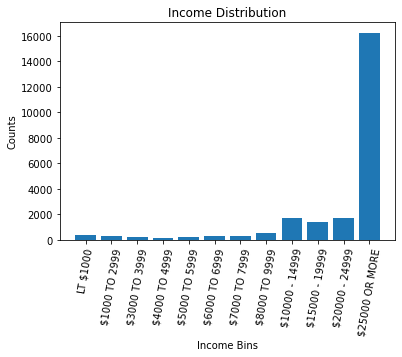

In [ ]:
plt.bar(income_bins['category'], income_bins['count'])
plt.xticks(rotation = 80)
plt.xlabel("Income Bins")
plt.ylabel("Counts")
plt.title("Income Distribution");

## Interpretation

The bins don't seem to be very well-structured since the distribution is heavily skewed to the left, with significant more people falling in the bin of 25000 or more. Initially, we wanted to look into income as a confounding variable to explore how it influenced respondents' answers on different questions of politics and morality. After the EDA, we notice that this data seems to be more interested in understanding specific gradations of poverty rather than getting a good understanding of income level across all respondents. Therefore, this data is not suited to usage in exploring income as a confounding variable. In order to do that, we would need more information on the bins above 25,000.

## Future EDA

For future EDA, we plan on digging deeper into these trends in the following ways:

1. Heatmaps over time: the trends we saw between marijuana use, homosexual relations, and gun regulation were clearly affected by party affiliation, but were overwhelmed by conservatism that came from the earlier years of the study. In order to get a clearer picture on the effects of party affiliation, we wanted to track these distributional shifts over time, paying particular attention to recent years, in which party polarization and affiliation reached extreme heights.

2. Other confounders/matching variable opportunities: now that we know the income variable is not a very strong data point to consider here, we can utilize other demographic information provided by the GSS to do matching or propensity scoring. We plan on visualizing these to see if we are able to condition on them to improve accuracy of our causal inference.